# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor

   


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


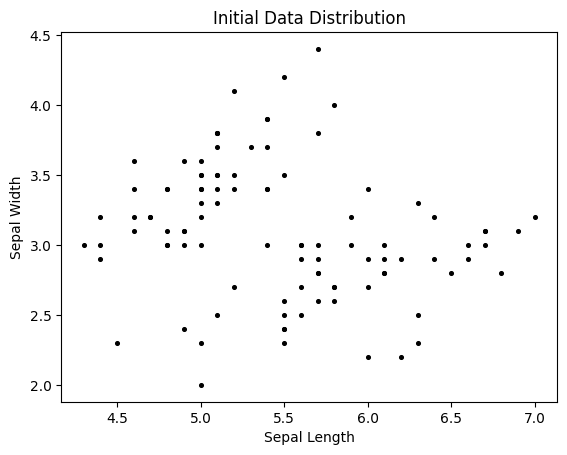

(100, 2)


In [4]:
# Load dataset and plot it

%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your file on Google Drive
file_path = '/content/drive/MyDrive/COEN_240_pujithakallu/project_5/simple_iris_dataset.csv'

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Extract sepal length and sepal width
df1 = df['sepal_length'].values[:100]
df2 = df['sepal_width'].values[:100]
X = np.array(list(zip(df1, df2)))  # Create 100 x 2 array with sepal length and width

# Plot the initial data
plt.scatter(df1, df2, c='black', s=7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Initial Data Distribution')
plt.show()

print(X.shape)


Algorithm converges after 5 iterations


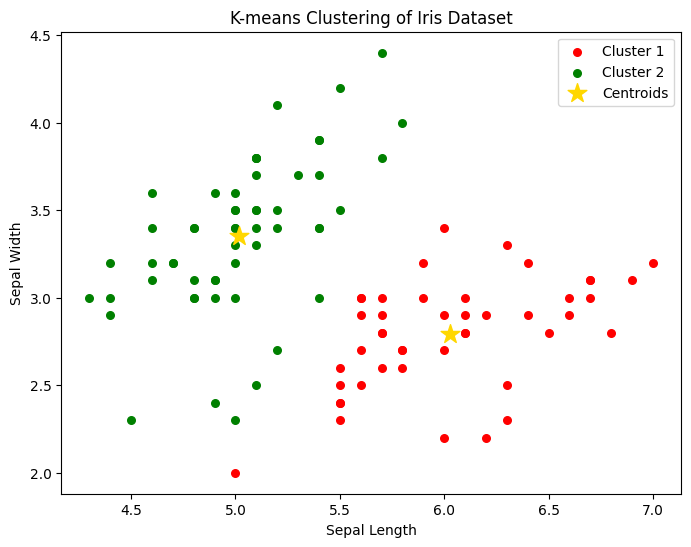

In [37]:
## Your code goes here ...
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for iteration in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.array_equal(centroids, new_centroids):
            print(f"Algorithm converges after {iteration + 1} iterations")
            return labels, centroids
        centroids = new_centroids
    print("Algorithm did not converge within {} iterations".format(max_iters))
    return labels, centroids

def plot_clusters(X, labels, centroids):
    colors = ['r', 'g']
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='gold', label='Centroids')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('K-means Clustering of Iris Dataset')
    plt.legend()
    plt.show()

# Run K-means algorithm
k = 2
labels, centroids = kmeans(X, k, max_iters=5)

# Plot the clusters and centroids
plot_clusters(X, labels, centroids)
